In [23]:
import pandas as pd
import seaborn as sns 
import numpy as np
from sklearn.metrics import plot_confusion_matrix
import kds
from numpy import power
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
from sklearn.metrics import confusion_matrix
from scipy import stats
from keras.models import Sequential
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SelectKBest , chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split ,GridSearchCV, cross_val_score, KFold ,StratifiedKFold
from sklearn import linear_model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from collections import Counter
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler, QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.utils import resample
import numpy
from keras.models import Sequential
from keras.layers import Dense, Dropout
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, 
                            classification_report, f1_score, accuracy_score, average_precision_score, precision_recall_fscore_support)
import warnings
warnings.filterwarnings('ignore')

<font color=blue><h1>Validation projet ML</h1> </font>


 <font color=red><h1>I. Compréhension du problème métier:</h1> </font>

Selon les données économiques, le taux de défaillance des prêts sur la carte de crédit dans toutes les banques commerciales devrait continuer à grimper tout au long des dernières années. L'escalade des défauts de paiement entraînera une perte d'argent importante de la part des établissements de crédit, tels que les banques commerciales. Par conséquent, il est très important que les banques disposent d'un modèle de prévision des risques et soient en mesure de classer les caractéristiques les plus relatives indiquant les personnes qui ont une probabilité plus élevée de faire défaut des prêts sur les cartes de crédit. 
	L'objectif de ce recherche est de trouver le meilleur modèle capable d'identifier si un client de carte de crédit fera défaut de paiement le mois prochain en fonction ses caractéristiques démographiques et de ses antécédents de paiement. Pour cela la méthodologie CRISP vient, comme la meilleure méthodologie appropriée à un projet de Data Science

### 
<font color=red><h1>II. Compréhension des données:</h1> </font>
#### Analyse de Forme :

Cet ensemble de données contient des informations sur les paiements par défaut, les facteurs démographiques, les données de crédit, l'historique des paiements et les relevés de facture des clients de cartes de crédit d'une banque importante à Taïwan d'avril 2005 à septembre 2005. Il y a 30 000 observations, 24 colonnes comme variables explicatives et une variable réponse binaire (‘default payment next month’) qui est la dernière colonne de l'ensemble de données.

 - Variable target : default payment next month
   - Lignes et colonnes : (30000, 25)
#### Dictionnaire:



* **ID**: ID of each client
* **LIMIT_BAL**: Amount of given credit in NT dollars (includes individual and family/supplementary credit
* **SEX**: Gender (1=male, 2=female)
* **EDUCATION**: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
* **MARRIAGE**: Marital status  (1 = married; 2 = single; 3 = divorce; 0=others).
* **AGE**: Age in years
* **PAY_0**: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
* **PAY_2**: Repayment status in August, 2005 (scale same as above)
* **PAY_3**: Repayment status in July, 2005 (scale same as above)
* **PAY_4**: Repayment status in June, 2005 (scale same as above)
* **PAY_5**: Repayment status in May, 2005 (scale same as above)
* **PAY_6**: Repayment status in April, 2005 (scale same as above)
* **BILL_AMT1**: Amount of bill statement in September, 2005 (NT dollar)
* **BILL_AMT2**: Amount of bill statement in August, 2005 (NT dollar)
* **BILL_AMT3**: Amount of bill statement in July, 2005 (NT dollar)
* **BILL_AMT4**: Amount of bill statement in June, 2005 (NT dollar)
* **BILL_AMT5**: Amount of bill statement in May, 2005 (NT dollar)
* **BILL_AMT6**: Amount of bill statement in April, 2005 (NT dollar)
* **PAY_AMT1**: Amount of previous payment in September, 2005 (NT dollar)
* **PAY_AMT2**: Amount of previous payment in August, 2005 (NT dollar)
* **PAY_AMT3**: Amount of previous payment in July, 2005 (NT dollar)
* **PAY_AMT4**: Amount of previous payment in June, 2005 (NT dollar)
* **PAY_AMT5**: Amount of previous payment in May, 2005 (NT dollar)
* **PAY_AMT6**: Amount of previous payment in April, 2005 (NT dollar)
* **default.payment.next.month**: Default payment (1=yes, 0=no)


  
    
#### Analyse de Fond : <br>

- Visualisation du cible : 77% de 0 et 23% de 1


In [2]:
pd.set_option('display.max_row',25)
pd.set_option('display.max_column',25)

In [2]:
data=pd.read_excel(r'C:\Users\User\Downloads\default of credit card clients.xls',header = 1)
data.rename(columns={"default payment next month":"Default"},inplace=True)
data



,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [19]:
data=data.copy()

In [20]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,30000.0,15000.500000,8660.398374,1.0,7500.75,15000.5,22500.25,30000.0
LIMIT_BAL,30000.0,167484.322667,129747.661567,10000.0,50000.00,140000.0,240000.00,1000000.0
SEX,30000.0,1.603733,0.489129,1.0,1.00,2.0,2.00,2.0
EDUCATION,30000.0,1.853133,0.790349,0.0,1.00,2.0,2.00,6.0
MARRIAGE,30000.0,1.551867,0.521970,0.0,1.00,2.0,2.00,3.0
AGE,30000.0,35.485500,9.217904,21.0,28.00,34.0,41.00,79.0
PAY_0,30000.0,-0.016700,1.123802,-2.0,-1.00,0.0,0.00,8.0
PAY_2,30000.0,-0.133767,1.197186,-2.0,-1.00,0.0,0.00,8.0
PAY_3,30000.0,-0.166200,1.196868,-2.0,-1.00,0.0,0.00,8.0
PAY_4,30000.0,-0.220667,1.169139,-2.0,-1.00,0.0,0.00,8.0


#### Nous pouvons voir que le niveau d'éducation moyen est de 1.853 ce qui peut inclure la plupart des clients ont des diplômes .L'âge médian est de 35.48 avec un écartype de 9.2

#### Nous remarquons aussi que le client le plus jeune a 21ans tandis que le client le plus âgé a 79ans.
#### Au niveau de l'état civil nous constatons que la majorité des clients soit mariés soit célibataires


In [21]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'Default'],
      dtype='object')

In [22]:
data.shape

(30000, 25)

#### Nous vérifions le type de données de chaque variable de l'ensemble de données. Nous voyons que toutes les colonnes sont de type int64 


In [23]:
data.dtypes.value_counts()
# tous les types des variables sont integer 

int64    25
dtype: int64

In [24]:
data=data.isnull() #pas de valeurs null

In [25]:
data.isna().sum().max()

0

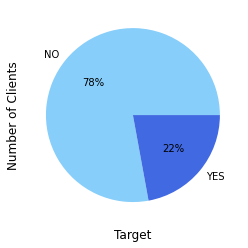

In [34]:
x =data["Default"].value_counts()
labels = ['NO', 'YES']
colors = ['lightskyblue', 'royalblue']
fig,ax = plt.subplots()
ax.pie(x, labels = labels, colors = colors,autopct='%.0f%%')
plt.xlabel("Target", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.show()

#### D’après la figure ci-dessous, nous pouvons voir que l'ensemble de données se compose de 78% des clients ne devraient pas faire défaut de paiement le mois prochain (NO)  alors que 22% des clients devraient faire défaut de paiement (YES)

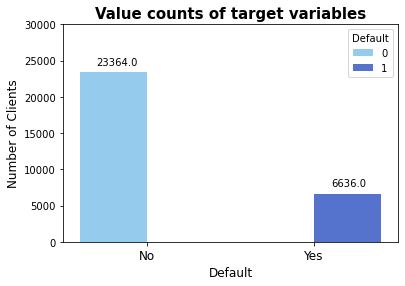

In [35]:

plt.figure(figsize=(6,4))
colors=['lightskyblue', 'royalblue']
# Plot values count of the target variable
ax = sns.countplot(x="Default", data=data,  hue='Default', palette=colors) 
plt.xlabel("Default", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,30000)
plt.xticks([0,1], ['No', 'Yes'], fontsize = 12)
plt.title('Value counts of target variables', fontsize=15, weight='bold')
# Annotate the bar 
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1000))
    

<font color=blue><h2>SEX vs Default</h2> </font>

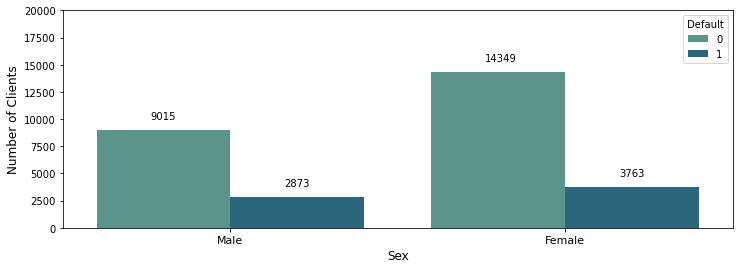

In [36]:
#SEX ET DEFAULT :
plt.figure(figsize=(12,4))
colors = ['lightskyblue', 'royalblue']
ax = sns.countplot(data = data, x = 'SEX', hue="Default", palette = 'crest')

plt.xlabel("Sex", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,20000)
plt.xticks([0,1],['Male', 'Female'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

#### Nous avons remarqué selon la figure ci-dessous que le nombre des femmes est supérieur à celui des hommes et que les femmes ont un risque de défaut de paiement plus élevé .

<font color=blue><h2>AGE</h2> </font>

<AxesSubplot:xlabel='AGE', ylabel='Density'>

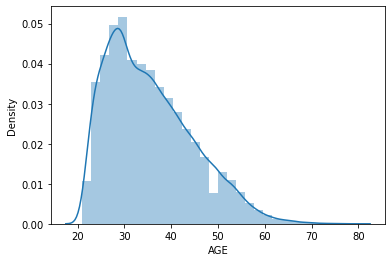

In [214]:
sns.distplot(data['AGE'],kde=True,bins=30)

#### Il y a un grand nombre de clients dont l'âge est compris entre 25 et 40 ans

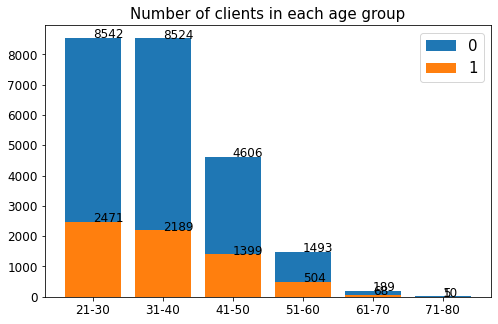

In [40]:
bins = [20,30,40,50,60,70,80]
names = ['21-30','31-40','41-50','51-60','61-70','71-80']
data['AGE_BIN'] = pd.cut(x=data.AGE, bins=bins, labels=names, right=True)

age_cnt = data.AGE_BIN.value_counts()
age_0 = (data.AGE_BIN[data['Default'] == 0].value_counts())
age_1 = (data.AGE_BIN[data['Default'] == 1].value_counts())

plt.subplots(figsize=(8,5))
# sns.barplot(data=defaulters, x='AGE_BIN', y='LIMIT_BAL', hue='def_pay', ci=0)
plt.bar(age_0.index, age_0.values, label='0')
plt.bar(age_1.index, age_1.values, label='1')
for x,y in zip(names,age_0):
    plt.text(x,y,y,fontsize=12)
for x,y in zip(names,age_1):
    plt.text(x,y,y,fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title("Number of clients in each age group", fontsize=15)
plt.legend(loc='upper right', fontsize=15)
plt.show()

###### D'aprés la figure ci-dessus, les clients qui appartiennet à l'intervall d'age [21-30] et qui ont une tendance aux défauts de paiement (1) sont nombreux (2471)

In [41]:
data['AGE_BIN'] = pd.cut(data['AGE'],[20, 25, 30, 35, 40, 50, 60, 80])
print(data['AGE_BIN'].value_counts())

(25, 30]    7142
(40, 50]    6005
(30, 35]    5796
(35, 40]    4917
(20, 25]    3871
(50, 60]    1997
(60, 80]     272
Name: AGE_BIN, dtype: int64


<font color=blue><h2>Education</h2> </font>

<AxesSubplot:>

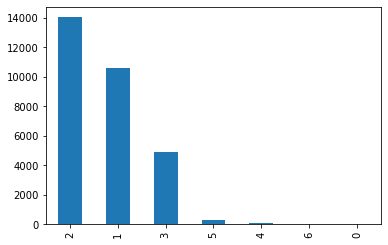

In [43]:
data['EDUCATION'].value_counts().plot.bar()


#### La majeure partie du niveau d'éducation du client appartient aux catégories 2,1 et 3.On peut regroupe les autre catégories dans un seul valeur 


In [44]:
data.loc[:,'EDUCATION'].replace({0:4, 5:4, 6:4}, inplace=True)

<font color=blue><h2>EDUCATION vs Default</h2> </font>

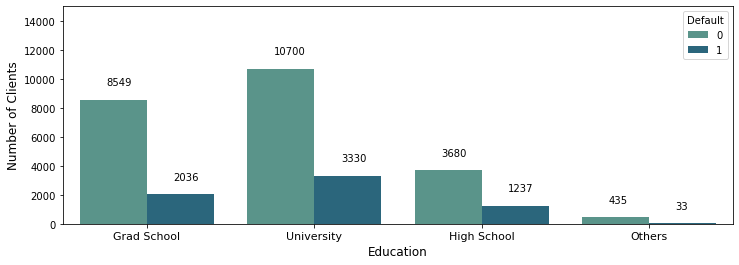

In [46]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'EDUCATION', hue="Default", palette = 'crest')

plt.xlabel("Education", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Grad School','University','High School','Others'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()


#### Nous constatons que le niveau d'éducation prédominant dans notre ensemble de données est « Grad School », suivi par « University», « High School» et « Others ».
#### Parmi ces trois premiers niveaux, les clients du niveau "University" qui sont envers 3330 ont une grande chance d'avoir un défaut paiement le moins prochain alors les clients du niveau "Others » ont une probabilité plus faible


<font color=blue><h2>Marriage</h2> </font>

<AxesSubplot:>

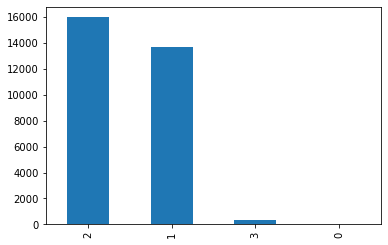

In [47]:
data['MARRIAGE'].value_counts().plot.bar()

##### Nous avons remarqué qu'il y a très moins de valeurs pour les catégories 3 et 0 (null dans others)
#####  Les clients célibataires(2=married) occupent la partie la plus grande dans notre dataset au niveau d'état civil 

<font color=blue><h2>MARRIAGE vs Default</h2> </font>

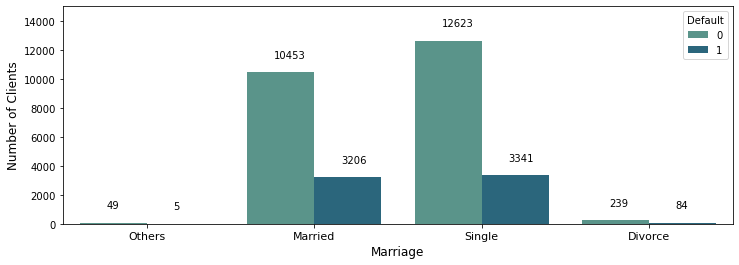

In [95]:
plt.figure(figsize=(12,4))

ax = sns.countplot(data = data, x = 'MARRIAGE', hue="Default", palette = 'crest')

plt.xlabel("Marriage", fontsize= 12)
plt.ylabel("Number of Clients", fontsize= 12)
plt.ylim(0,15000)
plt.xticks([0,1,2,3],['Others','Married','Single','Divorce'], fontsize = 11)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.16, p.get_height()+1000))

plt.show()

#### Nous constatons que les clients qui font un défaut de paiement le mois prochain appartient au catégorie célibataire (3341)

<font color=blue><h2>LIMIT_BAL</h2> </font>

In [49]:
data['LIMIT_BAL'].max()

1000000

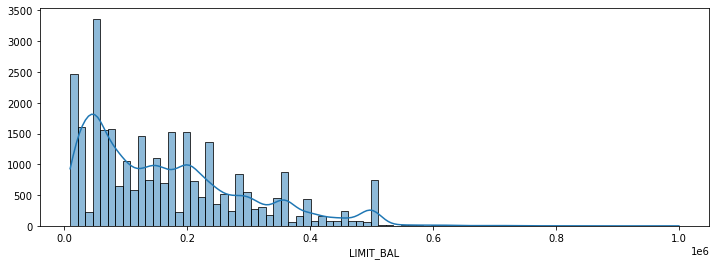

In [50]:
plt.figure(figsize=(12,4))
sns.histplot(data['LIMIT_BAL'], kde = True)
plt.ylabel('')
plt.show()


<font color=blue><h2>LIMIT_BAL vs Default</h2> </font>


##### Nous allons diviser  la colonne 'limit_bal' en bacs pour avoir un aperçu clair

In [52]:
data['Limit_Bin'] = pd.cut(data['LIMIT_BAL'],[5000, 50000, 100000, 150000, 200000, 300000, 400000, 500000, 1100000])
print(data['Limit_Bin'].value_counts())

(5000, 50000]        7676
(200000, 300000]     5059
(50000, 100000]      4822
(150000, 200000]     3978
(100000, 150000]     3902
(300000, 400000]     2759
(400000, 500000]     1598
(500000, 1100000]     206
Name: Limit_Bin, dtype: int64


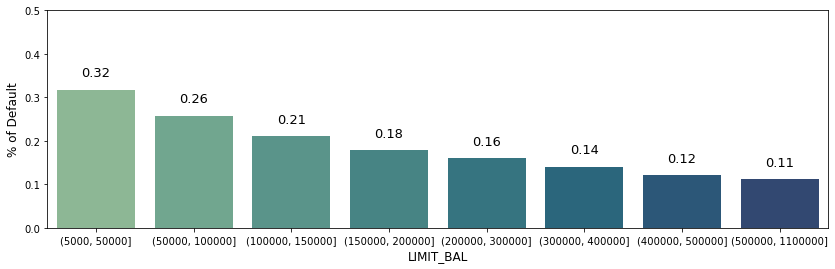

In [53]:
plt.figure(figsize=(14,4))
data['Limit_Bin'] = data['Limit_Bin'].astype('str')
LimitBin_order = ['(5000, 50000]', '(50000, 100000]', '(100000, 150000]', '(150000, 200000]',
                '(200000, 300000]', '(300000, 400000]', '(400000, 500000]', '(500000, 1100000]']

ax = sns.barplot(x = "Limit_Bin", y = "Default", data = data, palette = 'crest', ci = None, order = LimitBin_order)

plt.xlabel("LIMIT_BAL", fontsize= 12)
plt.ylabel("% of Default", fontsize= 12)
plt.ylim(0,0.5)

for p in ax.patches:
    ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.25, p.get_height()+0.03),fontsize=13)

plt.show()

#### Nous pouvons constater que le taux de défaut de paiement est important (plus de 30%) de la part des clients avec une limite de crédit entre 5 000 et 50 000 cela signifie que plus la limite de crédit est élevée, plus le risque de défaut est faible.

 <font color=blue><h2>PAY_x</h2> </font>

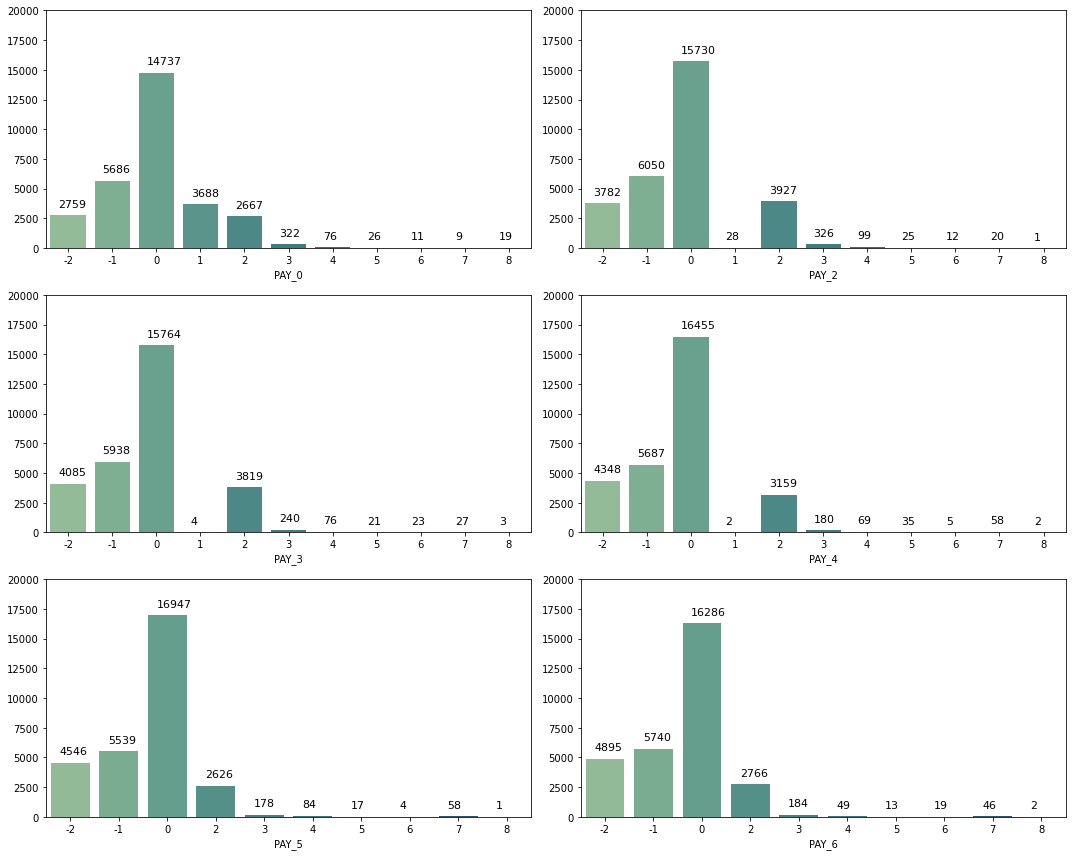

In [55]:
plt.figure(figsize=(15,12))
pay_x = ['PAY_0',  'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
for i,col in enumerate(pay_x):    
    plt.subplot(3,2,i + 1)
    ax = sns.countplot(data = data, x = col, palette = 'crest')
    plt.ylim(0,20000)
    plt.ylabel('')
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate((p.get_height()), (p.get_x()+0.180, p.get_height()+700), fontsize = 11)

plt.show()

##### D'aprés ces figures, on constate que Pay_x=0 (utilisation du crédit renouvelable) a un nombre trés élevées par rapport aux autres statuts de remboursement entre(14737 et 16286)

 <font color=blue><h2>PAY_x vs Default</h2> </font>

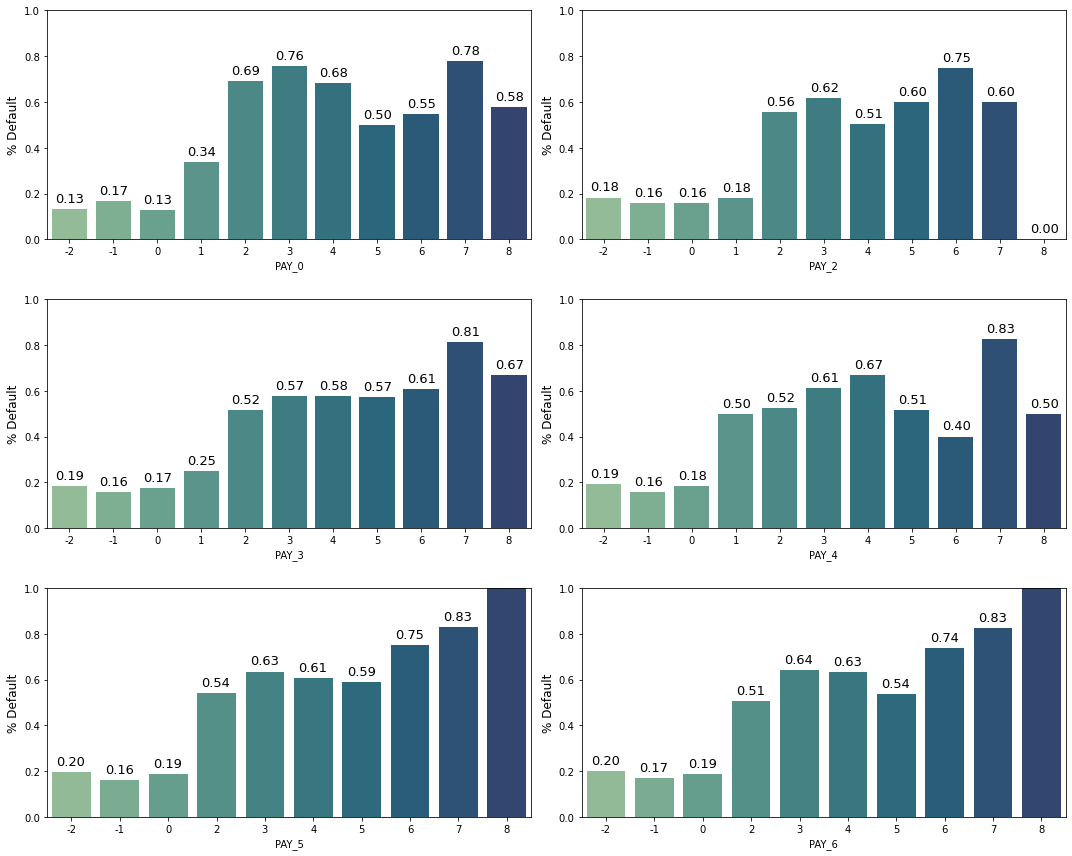

In [56]:
plt.figure(figsize=(15,12))

for i,col in enumerate(pay_x):    
    plt.subplot(3,2,i + 1)
    ax = sns.barplot(x = col, y = "Default", data = data, palette = 'crest', ci = None)
    plt.ylabel("% Default", fontsize= 12)
    plt.ylim(0,1)
    plt.tight_layout()
    
    for p in ax.patches:
        ax.annotate("%.2f" %(p.get_height()), (p.get_x()+0.09, p.get_height()+0.03),fontsize=13)

plt.show()

#### D’après ces graphes nous pouvons remarquer que la probabilité de défaut de paiement chez les  clients qui paient dûment leurs factures de carte des crédits (PAY_X = -1) est beaucoup plus faible que les autres (~ 0.16)

<font color=red><h1> III. Préparation de données</h1> </font>

Une bonne compréhension des données nous permettra d'avoir une bonne phase de prétraitement. Dans cette partie, nous nous concentrerons sur le processus de nettoyage des données nécessaires pour mieux l'explorer et comprendre certaines intuitions primaires.

<h3>Supperssion des observations illogiques :</h3>

In [3]:
ds = data.copy()


In [8]:
ds

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


Le but de cette approche est d'identifier et de supprimer les lignes à valeurs illogiques. Une ligne est classifiée à valeurs illogiques si ses valeurs de "PAY_X'" (Colonne 6->11) obéissent l'un des critères suivants :<br>
 •	Il existe deux valeurs positives successives dont la différence est supérieure à 1 (retard de 2 mois en mois d'avril suivi d'un retard de 4 mois ou plus en mois de mai) <br>
 •	Il existe une valeur négative ('PAID IN FULL, NO CONSUMPTION') suivie d'une valeur supérieure à 1 (comme les choix possibles sont : -2, -1, 0 ou 1) <br>
 •	Il existe une valeur "X" suivie par une succession de zéros suivie par une valeur "Y" supérieure à X+1 <br>
<font color=red>Cette méthode nous a aidés à supprimer 2844 lignes qui ne sont pas logiques</font>


In [4]:
dup = []
RowIndex =0
while (RowIndex<30000):
    PersistentValue=0
    #print(RowIndex)
    Flag=True
    ColumnIndex=11
    while (Flag==True and ColumnIndex>6):
        if (ds.loc[RowIndex][ColumnIndex]>0):
            PersistentValue = ds.loc[RowIndex][ColumnIndex]
            if (ds.loc[RowIndex][ColumnIndex]+2 < ds.loc[RowIndex][ColumnIndex-1]):        
                Flag=False
            ColumnIndex=ColumnIndex-1
        if (ds.loc[RowIndex][ColumnIndex]<0):
            PersistentValue = ds.loc[RowIndex][ColumnIndex]
            if (ds.loc[RowIndex][ColumnIndex-1]>1 ):
                Flag=False
            ColumnIndex=ColumnIndex-1  
        if (ds.loc[RowIndex][ColumnIndex] == 0):
            if ( PersistentValue > 0):
                if (ds.loc[RowIndex][ColumnIndex-1]> PersistentValue+2 ):
                    Flag=False
            ColumnIndex=ColumnIndex-1 
            if( PersistentValue < 0):
                if (ds.loc[RowIndex][ColumnIndex-1]>1 ):
                    Flag=False
            ColumnIndex=ColumnIndex-1
        if (PersistentValue == 0):
             ColumnIndex=ColumnIndex-1
    if (Flag == False):
        dup.append(ds.loc[RowIndex][0])
    RowIndex = RowIndex +1
#print (dup)

In [5]:
len(dup)

2844

In [6]:
ds=ds.drop(dup)


In [7]:
ds.shape

(27156, 25)

In [8]:
ds=ds.drop('ID',axis=1)

In [9]:
ds.shape

(27156, 24)

<h3>Suppresion les lignes dupliquées</h3>

In [52]:

ds1 = ds.drop_duplicates(subset=['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
ds1.shape

(27114, 24)

#### Nous avons constaté que notre base de données contient 42 lignes dupliquées .Ces lignes peuvent entrainer des bruits, pour cela nous avons les supprimés

In [53]:
ds1

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Default
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
6,500000,1,1,2,29,0,0,0,0,0,...,542653,483003,473944,55000,40000,38000,20239,13750,13770,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,3,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


<h3>Séparation entre les variables et cible</h3>

In [54]:
#Séparer les features et le label
y=ds1["Default"]
x=ds1.drop('Default',axis=1)
x 


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
6,500000,1,1,2,29,0,0,0,0,0,...,445007,542653,483003,473944,55000,40000,38000,20239,13750,13770
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,3,1,39,0,0,0,0,0,...,208365,88004,31237,15980,8500,20000,5003,3047,5000,1000
29996,150000,1,3,2,43,-1,-1,-1,-1,0,...,3502,8979,5190,0,1837,3526,8998,129,0,0
29997,30000,1,2,2,37,4,3,2,-1,0,...,2758,20878,20582,19357,0,0,22000,4200,2000,3100
29998,80000,1,3,1,41,1,-1,0,0,0,...,76304,52774,11855,48944,85900,3409,1178,1926,52964,1804


<h3>Transformation des données : </h3>

Cette méthode est utilisée pour supprimer le bruit d'un jeu de donnée.C'est l'une des techniques cruciales dans le Machine Learning. Ici, les données sont transformées pour qu'elles tombent sous une plage donnée. Lorsque les attributs sont sur des plages ou échelles différentes, la modélisation des données peut être difficile. La normalisation aide à appliquer des algorithmes du Machine Learning et à extraire les données plus rapidement.


In [55]:
sc = MinMaxScaler()
x_sc = sc.fit_transform(x)
x = pd.DataFrame(x_sc, columns=x.columns)
x.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0.010101,1.0,0.333333,0.333333,0.051724,0.4,0.444444,0.1,0.1,0.0,...,0.086723,0.160138,0.080648,0.260979,0.000000,0.000409,0.000000,0.000000,0.000000,0.000000
1,0.080808,1.0,0.333333,0.666667,0.224138,0.2,0.222222,0.2,0.2,0.2,...,0.093789,0.173637,0.095470,0.272928,0.001738,0.000891,0.001116,0.001610,0.002345,0.009458
2,0.040404,1.0,0.333333,0.333333,0.275862,0.2,0.222222,0.2,0.2,0.2,...,0.113407,0.186809,0.109363,0.283685,0.002290,0.001199,0.001339,0.001771,0.002506,0.001892
3,0.040404,0.0,0.333333,0.333333,0.620690,0.1,0.222222,0.1,0.2,0.2,...,0.106020,0.179863,0.099633,0.275681,0.002290,0.021779,0.011160,0.014493,0.001615,0.001284
4,0.494949,0.0,0.166667,0.666667,0.137931,0.2,0.222222,0.2,0.2,0.2,...,0.330672,0.671310,0.559578,0.625196,0.062961,0.023749,0.042409,0.032591,0.032237,0.026047


<h4>Diviser les données en données d'apprentissage et données de test</h4>

In [56]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
print('train set :',x_train.shape)
print('test set :',x_test.shape)


train set : (20335, 23)
test set : (6779, 23)


<font color=red><h1>IV.Modélisation et Evaluation </h1> </font>

 Dans cette phase, nous allons utiliser des algorithmes d'apprentissage supervisé pour la classification 
 Nous commençons par rechercher les meilleurs paramètres pour chaque classificateur à l'aide de Grid Search. Ensuite, nous évaluons le modèle à l'aide de rapport de surface comme l'indique dans l'article +. Nous essayons aussi d'améliorer le modèle à l'aide de méthodes ensemblistes.


In [13]:
#Le tableau des déciles est créé en triant d'abord les clients selon
#leurs probabilités prédites, par ordre décroissant du plus élevé (le plus proche de un)
#au plus bas (le plus proche de zéro). En répartissant les clients en segments de taille égale,
#nous créons des groupes contenant le même nombre de clients, par exemple, 10 groupes de déciles
#contenant chacun 10 % de la clientèle.
def decile_table(y_true, y_prob, labels=True, round_decimal=3):
   
    y_true = np.array(y_true) # creer un tableau y_true
    y_prob = np.array(y_prob) # creer un tableay y_prob

    df = pd.DataFrame() # creer Dataframe 'df'
    df['y_true'] = y_true
    df['y_prob'] = y_prob

    df.sort_values('y_prob', ascending=False, inplace=True) # trier les client selon leurs probabilités prédites, par ordre décroissant
    df['decile'] = np.linspace(1, 11, len(df), False, dtype=int)# on divise les clients en des segments de tailles egale

    # dt abbreviation for decile_table
    dt = df.groupby('decile').apply(lambda x: pd.Series([np.min(x['y_prob']),np.max(x['y_prob']),np.mean(x['y_prob']),
                                                         np.size(x['y_prob']),np.sum(x['y_true']),
                                                         np.size(x['y_true'][x['y_true'] == 0]),],
                                                        index=(["prob_min", "prob_max", "prob_avg", "cnt_cust", 
                                                                "cnt_resp", "cnt_non_resp"]))).reset_index()

    dt['prob_min']=dt['prob_min'].round(round_decimal) # colonne'prob_min' : probabilité min dans chaque décile
    dt['prob_max']=dt['prob_max'].round(round_decimal) # colonne'prob_max' : probabilité max dans chaque décile
    dt['prob_avg']=round(dt['prob_avg'],round_decimal)# colonne'prob_avg' : probabilitémoyenne dans chaque décile
    

    tmp = df[['y_true']].sort_values('y_true', ascending=False)
    tmp['decile'] = np.linspace(1, 11, len(tmp), False, dtype=int)

    dt['cnt_resp_wiz'] = tmp.groupby('decile', as_index=False)['y_true'].sum()['y_true']
    dt['cum_cust'] = np.cumsum(dt['cnt_cust']) # Return the cumulative sum of the cust
    dt['cum_resp'] = np.cumsum(dt['cnt_resp']) # Return the cumulative sum of the responders
    dt['cum_resp_wiz'] = np.cumsum(dt['cnt_resp_wiz']) #  Return the cumulative sum of the best responders
    dt['cum_cust_pct'] = round(dt['cum_cust'] * 100 / np.sum(dt['cnt_cust']), round_decimal) # % of cum_cust
    dt['cum_resp_pct'] = round(dt['cum_resp'] * 100 / np.sum(dt['cnt_resp']), round_decimal) # % of cum_resp_pct
    dt['cum_resp_pct_wiz'] = round(dt['cum_resp_wiz'] * 100 / np.sum(dt['cnt_resp_wiz']), round_decimal) # % of cum_resp_pct_wiz

    
    dt['lift'] = round(dt['cum_resp_pct'] / dt['cum_cust_pct'], round_decimal)

    if labels is True:
        print_labels()

    return dt[['decile', 'cum_resp_pct', 'cum_resp_pct_wiz']] # le num décile (10%,20ù),% de cumulées de répondeurs,% cumulées 
#meilleurs répondeurs possible


In [14]:
def area_ratio(pcg):
    # Area of the model 
    area_model = auc(np.append(0, pcg.decile.values), np.append(0, pcg.cum_resp_pct.values))
    # Area of the base model
    area_base = auc(np.append(np.arange(0, 100, 10), 100), np.append(np.arange(0, 10, 1), 10))
    # Area between model and base
    area_base_model = area_model - area_base
    # Area of the wizard (best model)
    area_best= auc(np.append(0, pcg.decile.values), np.append(0, pcg.cum_resp_pct_wiz.values))
    # Area between wizard and base
    diff_best_base = area_best - area_base
    # area ratio
    area_ratio = area_base_model / diff_best_base
    return area_ratio

In [15]:
#Génère le graphique de gain cumulé à partir des étiquettes et des probabilités
#Le tableau des gains cumulatifs est utilisé pour déterminer l'efficacité d'un
#classificateur binaire
def plot_lift_chart(pcg, area_ratio, title='Cumulative Gain Plot',
                         title_fontsize=14, text_fontsize=10, figsize=None):

    plt.plot(np.append(0, pcg.decile.values), np.append(0, pcg.cum_resp_pct.values),  label='Model')
    plt.plot(np.append(0, pcg.decile.values), np.append(0, pcg.cum_resp_pct_wiz.values), label='best curve')
    plt.plot([0, 10], [0, 100], 'k--', label='baseline')
    plt.text(4, 30, f"Area ratio: {area_ratio}")
    plt.title(title, fontsize=title_fontsize)
    plt.legend(borderpad=1)
    plt.grid(True)

<font color=blue><h2>Logistic regression (LR)</h2>

In [16]:
x_train_lr,y_train_lr,x_test_lr,y_test_lr = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

In [39]:
#Searching for the best parameters
param_grid=[{'penalty': ['l1','l2'], 
            'solver' : ['lbfgs', 'liblinear','newton-cg', 'sag', 'saga']}
           ]
grid=GridSearchCV(LogisticRegression(),param_grid,cv=5)
grid.fit(x_train_lr, y_train_lr)
grid.best_score_

0.8113597246127366

In [40]:
grid.best_params_

{'penalty': 'l1', 'solver': 'saga'}

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

LR error rate on train set (training): 0.18982050651585936
LR error rate on test (valid) set: 0.19339135565717658
************************
area ratio on train set (training): 0.4430866670975248
area ratio on test (valid) set 0.45105302093626015


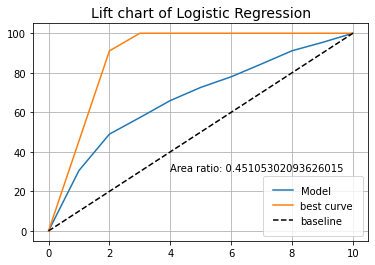

In [17]:
log_reg = linear_model.LogisticRegression(penalty='l1',solver= 'saga')
log_reg.fit(x_train_lr, y_train_lr)
train_pred =log_reg .predict(x_train_lr)
train_proba = log_reg.predict_proba(x_train_lr)
train_pcg = decile_table(y_train_lr, train_proba[:, 1], labels=False)
test_pred = log_reg.predict(x_test_lr)
test_proba = log_reg.predict_proba(x_test_lr)
test_pcg = decile_table(y_test_lr, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_lr, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_lr, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("LR error rate on train set (training):", error_rate_train) 
print("LR error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift chart of Logistic Regression')
# selon l'article : les données de validation sont 
#l'ensemble de données efficace utilisé pour mesurer la précision de la classification de généralisation des modèles
#---> on visualise the lift chart on test set 

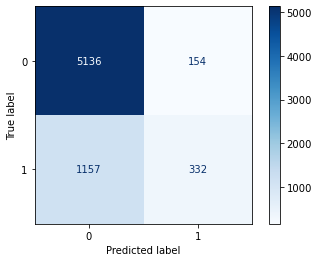

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5290
           1       0.68      0.22      0.34      1489

    accuracy                           0.81      6779
   macro avg       0.75      0.60      0.61      6779
weighted avg       0.79      0.81      0.77      6779



In [25]:
plot_confusion_matrix(log_reg, x_test_lr, y_test_lr,cmap=plt.cm.Blues)  
plt.show()
ypred =log_reg.predict(x_test_lr)
print(classification_report(y_test_lr, ypred))

<font color=blue><h2>K-nearest neighbor classifiers (KNN)</h2>

In [30]:
x_train_knn,y_train_knn,x_test_knn,y_test_knn = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

In [ ]:
#Searching for the best parameters
param_grid = {'n_neighbors': np.arange(1, 20),
              'metric': ['euclidean', 'manhattan'],
              'weights' : ['uniform', 'distance']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(x_train_knn, y_train_knn)
print(grid.best_params_)


<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

KNN error rate on train set (training): 0.20363904597983773
KNN error rate on test (valid) set: 0.2255494910753798
************************
area ratio on train set (training): 0.5529451302268468
area ratio on test (valid) set 0.2347789199228146


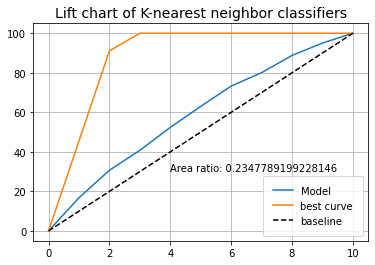

In [32]:
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1, weights='uniform')
knn_model = knn.fit(x_train_knn, y_train_knn)
train_pred = knn_model.predict(x_train_knn)
train_proba = knn_model.predict_proba(x_train_knn)
train_pcg = decile_table(y_train_knn, train_proba[:, 1], labels=False)
test_pred = knn_model.predict(x_test_knn)
test_proba = knn_model.predict_proba(x_test_knn)
test_pcg = decile_table(y_test_knn, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_knn, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_knn, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("KNN error rate on train set (training):", error_rate_train) 
print("KNN error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift chart of K-nearest neighbor classifiers')

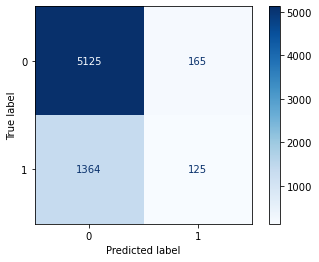

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      5290
           1       0.43      0.08      0.14      1489

    accuracy                           0.77      6779
   macro avg       0.61      0.53      0.51      6779
weighted avg       0.71      0.77      0.71      6779



In [33]:
plot_confusion_matrix(knn, x_test_knn, y_test_knn,cmap=plt.cm.Blues)  
plt.show()
ypred =knn.predict(x_test_knn)
print(classification_report(y_test_knn, ypred))

<font color=blue><h2>Naıve Bayesian classifier (NB)</h2>

In [58]:
x_train_nb,y_train_nb,x_test_nb,y_test_nb = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

NB error rate on train set (training): 0.4084091467912466
NB error rate on test (valid) set: 0.409647440625461
************************
area ratio on train set (training): 0.4691708136754348
area ratio on test (valid) set 0.45765929819297374


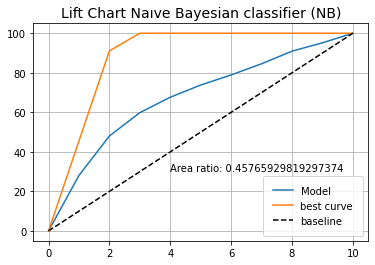

In [59]:
nb_model=GaussianNB()                  
nb_model.fit(x_train_nb,y_train_nb)
train_pred = nb_model.predict(x_train_nb)
train_proba = nb_model.predict_proba(x_train_nb)
train_pcg = decile_table(y_train_nb, train_proba[:, 1], labels=False)
test_pred = nb_model.predict(x_test_nb)
test_proba = nb_model.predict_proba(x_test_nb)
test_pcg = decile_table(y_test_nb, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_nb, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_nb, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("NB error rate on train set (training):", error_rate_train) 
print("NB error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Naıve Bayesian classifier (NB)')

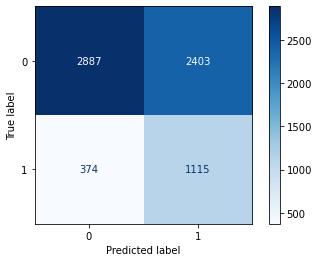

              precision    recall  f1-score   support

           0       0.89      0.55      0.68      5290
           1       0.32      0.75      0.45      1489

    accuracy                           0.59      6779
   macro avg       0.60      0.65      0.56      6779
weighted avg       0.76      0.59      0.62      6779



In [60]:
plot_confusion_matrix(nb_model, x_test_nb, y_test_nb,cmap=plt.cm.Blues)  
plt.show()
ypred =nb_model.predict(x_test_nb)
print(classification_report(y_test_nb, ypred))

<font color=blue><h2>Classification trees (CTs)</h2>


In [61]:
x_train_td,y_train_td,x_test_td,y_test_td = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

In [56]:
#Searching for the best parameters
param_grid = {'criterion': ['gini', 'entropy'],'max_depth': np.arange(1,10)}
grid=GridSearchCV( DecisionTreeClassifier(random_state=0),param_grid,cv=5)
grid.fit(x_train_td, y_train_td)
grid.best_params_

{'criterion': 'gini', 'max_depth': 1}


<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

CTs error rate on train set (training): 0.17506761740840915
CTs error rate on test (valid) set: 0.17657471603481334
************************
area ratio on train set (training): 0.5201266722678215
area ratio on test (valid) set 0.5130702893414935


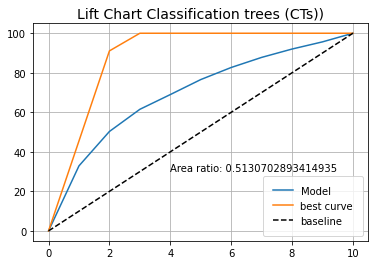

In [62]:
tree_model=DecisionTreeClassifier(criterion='gini', max_depth= 1)
tree_model.fit(x_train_td, y_train_td)
train_pred = tree_model.predict(x_train_td)
train_proba = tree_model.predict_proba(x_train_td)
train_pcg = decile_table(y_train_td, train_proba[:, 1], labels=False)
test_pred = tree_model.predict(x_test_td)
test_proba = tree_model.predict_proba(x_test_td)
test_pcg = decile_table(y_test_td, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_td, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_td, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("CTs error rate on train set (training):", error_rate_train) 
print("CTs error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Classification trees (CTs))')

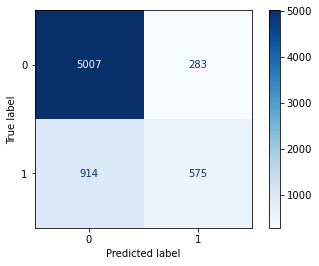

              precision    recall  f1-score   support

           0       0.85      0.95      0.89      5290
           1       0.67      0.39      0.49      1489

    accuracy                           0.82      6779
   macro avg       0.76      0.67      0.69      6779
weighted avg       0.81      0.82      0.80      6779



In [63]:
plot_confusion_matrix(tree_model, x_test_td, y_test_td,cmap=plt.cm.Blues)  
plt.show()
ypred =tree_model.predict(x_test_td)
print(classification_report(y_test_td, ypred))

<font color=blue><h2>Neural networks</h2>

In [93]:
x_train_ann,x_test_ann,y_train_ann,y_test_ann = train_test_split(x,y)

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

Neural Network errorrate on train set (training): 0.17393656257683798
Neural Network error rate on test (valid) set: 0.17627968726950882
************************
area ratio on train set (training): 0.5846936287858746
area ratio on test (valid) set 0.5422735223538871


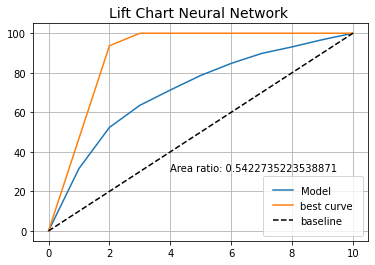

In [94]:
ANN_model= MLPClassifier()
ANN_model.fit(x_train_ann, y_train_ann)
# Predict proba & labels on the train data
train_pred_nnet = ANN_model.predict(x_train_ann)
train_proba_nnet = ANN_model.predict_proba(x_train_ann)

# Area ratio & accuracy on the train data
train_pcg = decile_table(y_train_ann, train_proba_nnet[:, 1], labels=False)
area_ratio_train = area_ratio(train_pcg)
error_rate_train = 1 - accuracy_score(y_train_ann, train_pred_nnet)

# Predict proba & labels on the test data
test_pred_nnet =ANN_model.predict(x_test_ann)
test_proba_nnet =ANN_model.predict_proba(x_test_ann)

# Area ratio & accuracy on the test data
test_pcg = decile_table(y_test_ann, test_proba_nnet[:, 1], labels=False)
error_rate_test = 1 - accuracy_score(y_test_ann, test_pred_nnet)
area_ratio_test = area_ratio(test_pcg)

      
print("Neural Network errorrate on train set (training):", error_rate_train) 
print("Neural Network error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
# Plot lift chart
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Neural Network ')


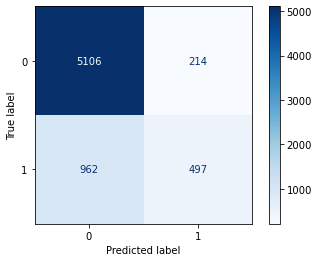

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5320
           1       0.70      0.34      0.46      1459

    accuracy                           0.83      6779
   macro avg       0.77      0.65      0.68      6779
weighted avg       0.81      0.83      0.80      6779



In [71]:
plot_confusion_matrix(ANN_model, x_test_ann, y_test_ann,cmap=plt.cm.Blues)  
plt.show()
ypred =ANN_model.predict(x_test_ann)
print(classification_report(y_test_ann, ypred))


<font color=blue><h2>Discriminant analysis (DA)</h2>


In [72]:
x_train_da,y_train_da,x_test_da,y_test_da = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

DA rate on train set (training): 0.18770592574379152
DA error rate on test (valid) set: 0.18955598170821653
************************
area ratio on train set (training): 0.43119756996057645
area ratio on test (valid) set 0.44184717099239


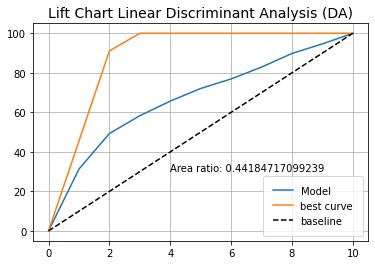

In [73]:
lda = LinearDiscriminantAnalysis()                    
lda.fit(x_train_da, y_train_da)
train_pred = lda.predict(x_train_da)
train_proba = lda.predict_proba(x_train_da)
train_pcg = decile_table(y_train_da, train_proba[:, 1], labels=False)
test_pred = lda.predict(x_test_da)
test_proba = lda.predict_proba(x_test_da)
test_pcg = decile_table(y_test_da, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_da, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_da, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("DA rate on train set (training):", error_rate_train) 
print("DA error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Linear Discriminant Analysis (DA)')

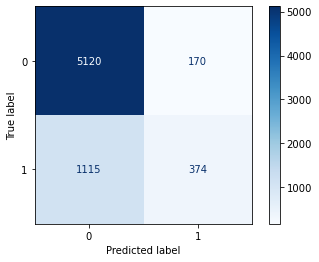

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      5290
           1       0.69      0.25      0.37      1489

    accuracy                           0.81      6779
   macro avg       0.75      0.61      0.63      6779
weighted avg       0.79      0.81      0.77      6779



In [76]:
plot_confusion_matrix(lda, x_test_da, y_test_da,cmap=plt.cm.Blues)  
plt.show()
ypred =lda.predict(x_test_da)
print(classification_report(y_test_da, ypred))

<font color=red><h1>Les méthodes ensemblistes</h1> </font>

 Deux familles de méthodes ensemblistes ont été proposées: Bagging & Boosting
<font color=green><h3>Bagging </h3></font><BR>
 L’objectif général de la technique de Bagging est de corriger l’instabilité des arbres de décision en réduisant la variance de l’estimateur.
 Le RandomForest est l' algorithme de Bagging  le plus utilisé.
<font color=green><h3> Boosting </h3></font> <BR>
Le boosting est une technique ensembliste dans laquelle les classifieurs ne sont pas créés indépendamment (tel qu’il est le cas dans les approches Bagging), mais séquentiellement.
Les classifieurs suivants apprennent des erreurs des classifieurs précédents.
Le gradient Boosting, AdaBoost et Xgboost sont les algorithmes de Boosting les plus utilisés.

<font color=blue><h2>RandomForest </h2>

In [77]:
x_train_rf,y_train_rf,x_test_rf,y_test_rf = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

In [77]:
param_dist = {'n_estimators': [50,100,150,200,250],
               "max_features": [1,2,3,4,5,6,7,8,9],
               'max_depth': [1,2,3,4,5,6,7,8,9],
               "criterion": ["gini", "entropy"]}

rf = RandomForestClassifier()

rf_cv = RandomizedSearchCV(rf, param_distributions = param_dist, 
                           cv = 5, random_state=0, n_jobs = -1)

rf_cv.fit(x_train_rf, y_train_rf)

print("Tuned Random Forest Parameters: %s" % (rf_cv.best_params_))

Tuned Random Forest Parameters: {'n_estimators': 200, 'max_features': 6, 'max_depth': 5, 'criterion': 'entropy'}


<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

Random Forest error on train set (training): 0.0
Random Forest error rate on test (valid) set: 0.18129517627968728
************************
area ratio on train set (training): 1.0
area ratio on test (valid) set 0.5403438161209717


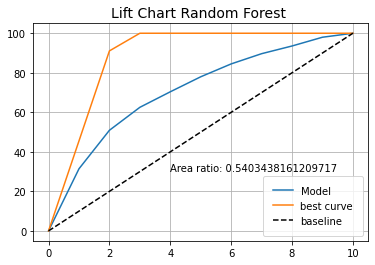

In [78]:
rf=RandomForestClassifier(n_estimators=200,criterion='entropy',n_jobs=-1,random_state=43)
rf.fit(x_train_rf, y_train_rf)
train_pred = rf.predict(x_train_rf)
train_proba = rf.predict_proba(x_train_rf)
train_pcg = decile_table(y_train_rf, train_proba[:, 1], labels=False)
test_pred = rf.predict(x_test_rf)
test_proba = rf.predict_proba(x_test_rf)
test_pcg = decile_table(y_test_rf, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_rf, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_rf, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("Random Forest error on train set (training):", error_rate_train) 
print("Random Forest error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )

plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Random Forest ')

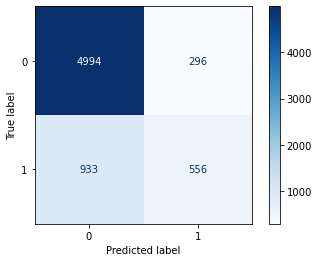

              precision    recall  f1-score   support

           0       0.84      0.94      0.89      5290
           1       0.65      0.37      0.48      1489

    accuracy                           0.82      6779
   macro avg       0.75      0.66      0.68      6779
weighted avg       0.80      0.82      0.80      6779



In [79]:
plot_confusion_matrix(rf, x_test_rf, y_test_rf,cmap=plt.cm.Blues)  
plt.show()
ypred =rf.predict(x_test_rf)
print(classification_report(y_test_rf, ypred))

<font color=blue><h2>AdaBoost </h2>

In [80]:
x_train_adbo,y_train_adbo,x_test_adbo,y_test_adbo = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

AdaBoost rate on train set (training): 0.18150971231866242
AdaBoost error rate on test (valid) set: 0.17982003245316414
************************
area ratio on train set (training): 0.56726685193563
area ratio on test (valid) set 0.5427804305202768


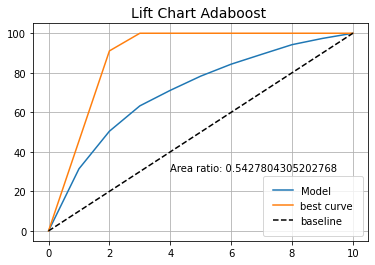

In [81]:
ADB=AdaBoostClassifier(n_estimators=50,algorithm='SAMME.R',random_state=42,learning_rate=1)
ABD_model=ADB.fit(x_train_adbo,y_train_adbo)
train_pred = ADB.predict(x_train_adbo)
train_proba = ADB.predict_proba(x_train_adbo)
train_pcg = decile_table(y_train_adbo, train_proba[:, 1], labels=False)
test_pred = ADB.predict(x_test_adbo)
test_proba = ADB.predict_proba(x_test_adbo)
test_pcg = decile_table(y_test_adbo, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_adbo, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_adbo, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("AdaBoost rate on train set (training):", error_rate_train) 
print("AdaBoost error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Adaboost ')

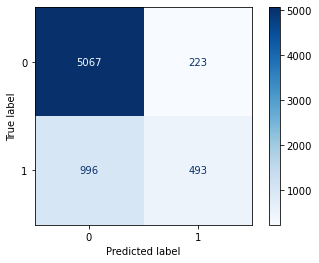

              precision    recall  f1-score   support

           0       0.84      0.96      0.89      5290
           1       0.69      0.33      0.45      1489

    accuracy                           0.82      6779
   macro avg       0.76      0.64      0.67      6779
weighted avg       0.80      0.82      0.79      6779



In [82]:
plot_confusion_matrix(ADB, x_test_adbo, y_test_adbo,cmap=plt.cm.Blues)  
plt.show()
ypred =ADB.predict(x_test_adbo)
print(classification_report(y_test_adbo, ypred))

 <font color=blue><h2>Gradient Boost</h2>

In [83]:
x_train_Gboost,y_train_Gboost,x_test_Gboost,y_test_Gboost= x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

Gradient Boost Boost rate on train set (training): 0.17487091222030982
Gradient Boost error rate on test (valid) set: 0.1750995722082903
************************
area ratio on train set (training): 0.6005402959994831
area ratio on test (valid) set 0.5639727678594527


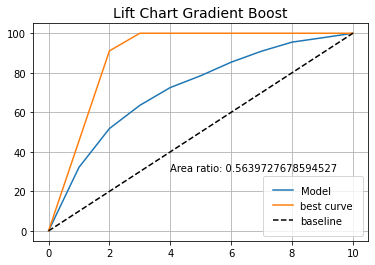

In [84]:
Gb=GradientBoostingClassifier(criterion= 'friedman_mse', loss= 'deviance', max_features= 'sqrt')
Gb.fit(x_train_Gboost, y_train_Gboost)
train_pred = Gb.predict(x_train_Gboost)
train_proba = Gb.predict_proba(x_train_Gboost)
train_pcg = decile_table(y_train_Gboost, train_proba[:, 1], labels=False)
test_pred = Gb.predict(x_test_Gboost)
test_proba = Gb.predict_proba(x_test_Gboost)
test_pcg = decile_table(y_test_Gboost, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_Gboost, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_Gboost, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("Gradient Boost Boost rate on train set (training):", error_rate_train) 
print("Gradient Boost error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Gradient Boost')

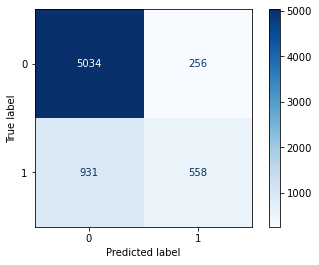

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5290
           1       0.69      0.37      0.48      1489

    accuracy                           0.82      6779
   macro avg       0.76      0.66      0.69      6779
weighted avg       0.81      0.82      0.80      6779



In [86]:
plot_confusion_matrix(Gb, x_test_Gboost, y_test_Gboost,cmap=plt.cm.Blues)  
plt.show()
ypred =Gb.predict(x_test_Gboost)
print(classification_report(y_test_Gboost, ypred))


<font color=blue><h2>xgBoost </h2>

In [88]:
x_train_xgb,y_train_xgb,x_test_xgb,y_test_xgb = x_train.copy(),y_train.copy(),x_test.copy(),y_test.copy()

<font color=green><h3>Création du modèle et affichage de taux d'erreur et le rapport de surface</h3>

[21:15:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Xgboost rate on train set (training): 0.1782640767150233
Xgboost error rate on test (valid) set: 0.17288685646850566
************************
area ratio on train set (training): 0.5857584178892263
area ratio on test (valid) set 0.5624052643286899


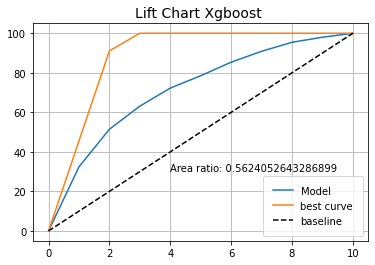

In [89]:
xgboost=XGBClassifier(learning_rate= 0.1 ,n_estimators= 140,max_depth= 2)
xgboost.fit(x_train_xgb, y_train_xgb)
train_pred = xgboost.predict(x_train_xgb)
train_proba = xgboost.predict_proba(x_train_xgb)
train_pcg = decile_table(y_train_xgb, train_proba[:, 1], labels=False)
test_pred = xgboost.predict(x_test_xgb)
test_proba = xgboost.predict_proba(x_test_xgb)
test_pcg = decile_table(y_test_xgb, test_proba[:, 1], labels=False)
error_rate_train = 1 - accuracy_score(y_train_xgb, train_pred)
area_ratio_train = area_ratio(train_pcg)
error_rate_test = 1 - accuracy_score(y_test_xgb, test_pred)
area_ratio_test = area_ratio(test_pcg)
print("Xgboost rate on train set (training):", error_rate_train) 
print("Xgboost error rate on test (valid) set:",error_rate_test )
print("************************")  
print("area ratio on train set (training):",area_ratio_train )
print("area ratio on test (valid) set",area_ratio_test )
plot_lift_chart(test_pcg, area_ratio_test, title='Lift Chart Xgboost ')

In [585]:
from sklearn.metrics import plot_confusion_matrix

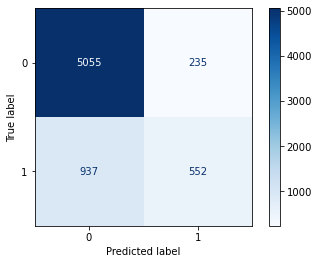

              precision    recall  f1-score   support

           0       0.84      0.96      0.90      5290
           1       0.70      0.37      0.49      1489

    accuracy                           0.83      6779
   macro avg       0.77      0.66      0.69      6779
weighted avg       0.81      0.83      0.81      6779



In [90]:
plot_confusion_matrix(xgboost,x_test_xgb, y_test_xgb,cmap=plt.cm.Blues)  
plt.show()
ypred =xgboost.predict(x_test_xgb)
print(classification_report(y_test_xgb, ypred))

# interprétation :

D'aprés les résultats obtenus dans les différents graphes on peut remarquer que le taux d'erreur est insensible à la précision de la classification des modèles car qu'il y a peu de différences dans les taux d'erreur entre ces derniers. 
Cependant, il existe des différences relativement importantes dans le rapport de surface entre les six techniques.Ce rapport peut offrir une meilleure solution pour comparer les performances de modèles différents de celui du taux d'erreur

De plus on a fait les testes sur le test (valid) puisque les données de validation sont l'ensemble de données efficace utilisé pour mesurer la précision de la classification des modèles.

Dans les données d'apprentissage, sur la base des taux d'erreur, les classificateurs K-plus proches voisins et les arbres de classification ont le taux d'erreur le plus faible (= 0,17) et pour le rapport de surface, les classificateurs des K plus proches voisins, avec le rapport de surface le plus élevé (=0,6779), fonctionnent mieux que les autres méthodes. Mais dans les données de validation (set), les réseaux de neurones artificiels obtiennent les meilleures performances avec le rapport de surface le plus élevé (=0,542) et le taux d'erreur relativement faible (=0.17). 
 <font color=blue><h6>Nous pouvons donc conclure que les réseaux de neurones artificiels effectuent une classification plus précise que les cinq autres méthodes</h6></font>

Finalement on peut classifier les algorithmes comme suit : <br>
            1/ Neural Networks =0.542<br>
            2/ Classification Trees  = 0.5135 <br>
            3/ Naive Bayesian  = 0.4576 <br>
            4/ KNearest Neighbor = 0.4567 <br>
            5/ Logistic Regression = 0.44427 <br>
            6/ Discriminant Analysis = 0.4418 <br>

Avec l'utilisation des méthodes ensemblistes(esembles des classifieurs individuels,qui sont divers mais précis dont les précisions sont combinées pour donner une décision plus précise ),le rapport de surface augement par rapport aux algorithmes précédents 
on peut remarquer que l'algorithme Gradient Boost a donné un rapport de surface le plus élevé(=0.5657) ensuite Xbgboost avec un rapport de surface (=0.5624) <br>
Nous conclurons que ces méthodes sont trés puissantes pour créer des modèles prédictifs.

<font color=red><h2>Approche Sorting Smoothing Method (SSM)</h2> </font>


Cependant, dans l'étude de la gestion des risques, la confiance d'un modèle sur un échantillon individuel pour appartenir à la classe prédite par le modèle est beaucoup plus significative que de simples résultats de classification binaires tels que "par défaut" ou "non par défaut". Par le terme « confiance », nous entendons l'exactitude de la probabilité de défaut prédite.
Étant donné que la probabilité réelle de défaut est inconnue, la « Méthode de lissage de tri », SSM est utilisée ici pour estimer la probabilité réelle de défaut. Premièrement, en fonction de la probabilité prédictive d'un modèle, nous trions l'ensemble de validation ou de test par ordre croissant. Ensuite, SSM est utilisé pour estimer la probabilité réelle 

In [505]:
validationDataProbability_lr = log_reg.predict_proba(x_test) # probabilité de défaut prédective (LR)
Array =[]
P =[] 
n=50
for i in np.arange(0,len(validationDataProbability_lr)):
    Array.append([validationDataProbability_lr[i][1],y_test[i],i])
Array.sort()
for j in np.arange(0,len(validationDataProbability_lr)):
    P.append([Array[j][2],0])
    for k in np.arange(max(0,j-n),min(len(Array),j+n+1)):
        P[j][1]=P[j][1]+Array[k][1]    
    P[j][1]=P[j][1]/(2*n+1)
P.sort()
Q = []  # probabilité de défaut réeLle 
for s in np.arange(0,len(P)):
    Q.append(P[s][1])
    


<function matplotlib.pyplot.show(close=None, block=None)>

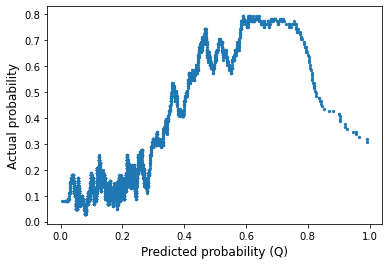

In [506]:
plt.scatter(validationDataProbability_lr[:,1],Q,s=5)
plt.xlabel("Predicted probability (Q)", fontsize= 12)
plt.ylabel("Actual probability", fontsize= 12)
plt.show

In [508]:
from sklearn.metrics import r2_score 
R_square = r2_score(Q,validationDataProbability_lr[:,1]) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.786147907627874


In [523]:
validationDataProbability_knn =knn.predict_proba(x_test) # probabilité de défaut prédective (KNN)
Array =[]
P =[] 
n=50
for i in np.arange(0,len(validationDataProbability_knn)):
    Array.append([validationDataProbability_knn[i][1],y_test[i],i])
Array.sort()
for j in np.arange(0,len(validationDataProbability_knn)):
    P.append([Array[j][2],0])
    for k in np.arange(max(0,j-n),min(len(Array),j+n+1)):
        P[j][1]=P[j][1]+Array[k][1]    
    P[j][1]=P[j][1]/(2*n+1)
P.sort()
Q = [] # probabilité de défaut réeLle 
for s in np.arange(0,len(P)):
    Q.append(P[s][1])
H=[]
m=0
a=[]
while (m<len(validationDataProbability_knn)):
    if (abs(Q[m]-validationDataProbability_knn[m][1])<0.15):
        H.append(validationDataProbability_knn[m][1])
    else:
        a.append(m)
    m=m+1
a.sort(reverse=True)
for n in np.arange(0,len(a)):
    Q.pop(a[n])



<function matplotlib.pyplot.show(close=None, block=None)>

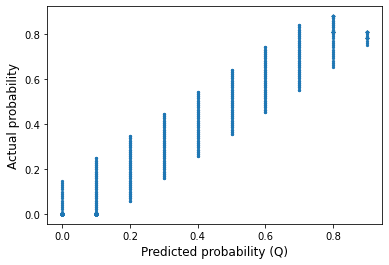

In [524]:
#plt.scatter(validationDataProbability_knn[:,1],Q,s=5)
plt.scatter(H,Q,s=5)
plt.xlabel("Predicted probability (Q)", fontsize= 12)
plt.ylabel("Actual probability", fontsize= 12)
plt.show

In [525]:
from sklearn.metrics import r2_score 
R_square = r2_score(Q,H) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8718554721852397


In [567]:
validationDataProbability_nb =nb_model.predict_proba(x_test) # probabilité de défaut prédective (nb)
Array =[]
P =[]
n=50
for i in np.arange(0,len(validationDataProbability_nb)):
    Array.append([validationDataProbability_nb[i][1],y_test[i],i])
Array.sort()
for j in np.arange(0,len(validationDataProbability_nb)):
    P.append([Array[j][2],0])
    for k in np.arange(max(0,j-n),min(len(Array),j+n+1)):
        P[j][1]=P[j][1]+Array[k][1]    
    P[j][1]=P[j][1]/(2*n+1)
P.sort()
Q = []  # probabilité de défaut réelle 
for s in np.arange(0,len(P)):
    Q.append(P[s][1])
    
H=[]
m=0
a=[]
while (m<len(validationDataProbability_nb)):
    if (abs(Q[m]-validationDataProbability_nb[m][1])<0.95):
        H.append(validationDataProbability_nb[m][1])
    else:
        a.append(m)
    m=m+1
a.sort(reverse=True)
for n in np.arange(0,len(a)):
    Q.pop(a[n])

<function matplotlib.pyplot.show(close=None, block=None)>

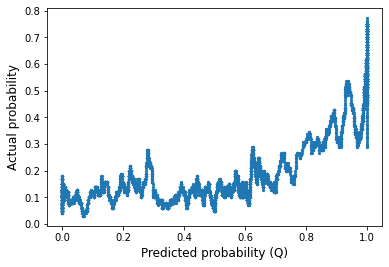

In [568]:
plt.scatter(H,Q,s=5)
plt.xlabel("Predicted probability (Q)", fontsize= 12)
plt.ylabel("Actual probability", fontsize= 12)
plt.show

In [569]:
corr_matrix = numpy.corrcoef(H,Q)
corr = corr_matrix[0,1]
R_sq = corr**2
print('Coefficient of Determination', R_sq)

Coefficient of Determination 0.6192175433951654


In [529]:
validationDataProbability_ann =ANN_model.predict_proba(x_test) # probabilité de défaut prédective (ANN)
Array =[]
P =[]  
n=50
for i in np.arange(0,len(validationDataProbability_ann)):
    Array.append([validationDataProbability_ann[i][1],y_test[i],i])
Array.sort()
for j in np.arange(0,len(validationDataProbability_ann)):
    P.append([Array[j][2],0])
    for k in np.arange(max(0,j-n),min(len(Array),j+n+1)):
        P[j][1]=P[j][1]+Array[k][1]    
    P[j][1]=P[j][1]/(2*n+1)
P.sort()
Q = []# probabilité de défaut réelLe
for s in np.arange(0,len(P)):
    Q.append(P[s][1])
    
H=[]
m=0
a=[]
while (m<len(validationDataProbability_ann)):
    if (abs(Q[m]-validationDataProbability_ann[m][1])<0.15):
        H.append(validationDataProbability_ann[m][1])
    else:
        a.append(m)
    m=m+1
a.sort(reverse=True)
for n in np.arange(0,len(a)):
    Q.pop(a[n])

<function matplotlib.pyplot.show(close=None, block=None)>

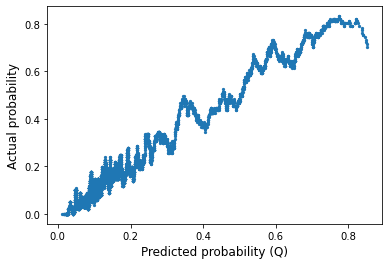

In [530]:
plt.scatter(H,Q,s=5)
plt.xlabel("Predicted probability (Q)", fontsize= 12)
plt.ylabel("Actual probability", fontsize= 12)
plt.show

In [531]:
from sklearn.metrics import r2_score 
R_square = r2_score(Q,H) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.9583552681439024


In [535]:
validationDataProbability_tree =tree_model.predict_proba(x_test) # probabilité de défaut prédective (tree)
Array =[]
P =[]
n=50
for i in np.arange(0,len(validationDataProbability_tree)):
    Array.append([validationDataProbability_tree[i][1],y_test[i],i])
Array.sort()
for j in np.arange(0,len(validationDataProbability_tree)):
    P.append([Array[j][2],0])
    for k in np.arange(max(0,j-n),min(len(Array),j+n+1)):
        P[j][1]=P[j][1]+Array[k][1]    
    P[j][1]=P[j][1]/(2*n+1)
P.sort()
Q = [] # probabilité de défaut réelle 
for s in np.arange(0,len(P)):
    Q.append(P[s][1])



<function matplotlib.pyplot.show(close=None, block=None)>

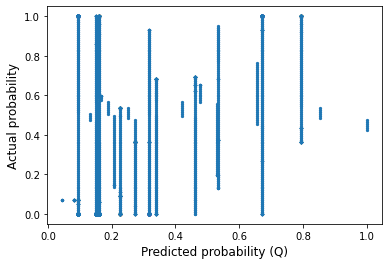

In [536]:
plt.scatter(validationDataProbability_tree[:,1],Q,s=5)
plt.xlabel("Predicted probability (Q)", fontsize= 12)
plt.ylabel("Actual probability", fontsize= 12)
plt.show

In [537]:
from sklearn.metrics import r2_score 
R_square = r2_score(Q,validationDataProbability_tree[:,1]) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.30998821059399695


In [542]:
validationDataProbability_lda =lda.predict_proba(x_test) # probabilité de défaut prédective (LDA)
Array =[]
P =[]
n=50
for i in np.arange(0,len(validationDataProbability_lda)):
    Array.append([validationDataProbability_lda[i][1],y_test[i],i])
Array.sort()
for j in np.arange(0,len(validationDataProbability_lda)):
    P.append([Array[j][2],0])
    for k in np.arange(max(0,j-n),min(len(Array),j+n+1)):
        P[j][1]=P[j][1]+Array[k][1]    
    P[j][1]=P[j][1]/(2*n+1)
P.sort()
Q = []  # probabilité de défaut réelle 
for s in np.arange(0,len(P)):
    Q.append(P[s][1])



<function matplotlib.pyplot.show(close=None, block=None)>

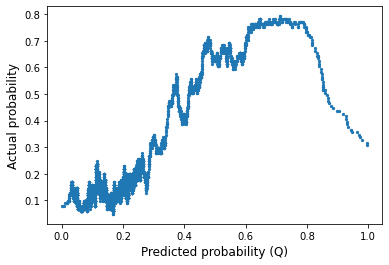

In [543]:
plt.scatter(validationDataProbability_lda[:,1],Q,s=5)
plt.xlabel("Predicted probability (Q)", fontsize= 12)
plt.ylabel("Actual probability", fontsize= 12)
plt.show


In [544]:
from sklearn.metrics import r2_score 
R_square = r2_score(Q,validationDataProbability_lda[:,1]) 
print('Coefficient of Determination', R_square)

Coefficient of Determination 0.8190392856043023


<font color=red><h2>Partie Bonus : Interval de prédiction</h2></font>

Prediction Interval: 40.408
95% likelihood that the true value is between 162.920 and 203.328
True value: 180.955


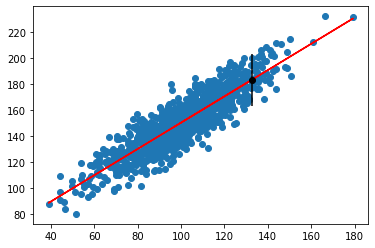

In [603]:
# linear regression prediction with prediction interval
from numpy.random import randn
from numpy.random import seed
from numpy import power
from numpy import sqrt
from numpy import mean
from numpy import std
from numpy import sum as arraysum
from scipy.stats import linregress
from matplotlib import pyplot
# seed random number generator
seed(1)
# prepare data
x = 20 * randn(1000) + 100
y = x + (10 * randn(1000) + 50)
# fit linear regression model
b1, b0, r_value, p_value, std_err = linregress(x, y)
# make predictions
yhat = b0 + b1 * x
# define new input, expected value and prediction
x_in = x[0]
y_out = y[0]
yhat_out = yhat[0]
# estimate stdev of yhat
sum_errs = arraysum((y - yhat)**2)
stdev = sqrt(1/(len(y)-2) * sum_errs)
# calculate prediction interval
interval = 1.96 * stdev
full_interval = interval*2
print('Prediction Interval: %.3f' % full_interval)
lower, upper = yhat_out - interval, yhat_out + interval
print('95%% likelihood that the true value is between %.3f and %.3f' % (lower, upper))
print('True value: %.3f' % y_out)
# plot dataset and prediction with interval
pyplot.scatter(x, y)
pyplot.plot(x, yhat, color='red')
pyplot.errorbar(x_in, yhat_out, yerr=interval, color='black', fmt='o')
pyplot.show()





# interprétation :
                                       1/Neural Networks : R²=0.958
                                       2/ Classification Trees : R²=0.309 
                                       3/ Naive Bayesian : R²=0.619 
                                       4/ KNearest Neighbor : R²=0.87 
                                       5/ Logistic Regression : R²=0.67 
                                       6/ Discriminant Analysis : R²=0.81 

D'après ces résultats, les réseaux de neurones affichent la meilleure performance basée sur R² (=0.958 proche de 1)<br>
--> La probabilité de défaut prédictibe produite par les réseaux de neurones est la seule qui pourrait etre utilisée pour réprésenter la probabilité de défaut réelle 